In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
filenames = {"./stats/April28/stats_low.txt": ["Low-power Conventional BERT large",
                                               "Low-power Conventional BERT medium",
                                               "Low-power Conventional BERT mini"],
             "./stats/April28/stats_high.txt": ["High-power Conventional BERT large",
                                               "High-power Conventional BERT medium",
                                               "High-power Conventional BERT mini"],
             "./stats/April28/stats_med.txt": ["Med-power Conventional BERT large"],
             "./stats/April28/stats_med2.txt": ["Conventional Tiled L1,L2 v1"],
             "./stats/May2/stats_med.txt": ["Med-power SMM BERT large",
                                            "Med-power SMM BERT medium",
                                            "Med-power SMM BERT mini",
                                            "Med-power SMM BERT large v2",
                                            "Med-power SMM BERT large v5",
                                            "Med-power SMM BERT medium_v1",
                                            "Med-power SMM BERT large v6",
                                            "Med-power SMM BERT mini v2",
                                            "Med-power SMM BERT medium v2",],
             "./stats/May2/stats_med1.txt": ["Conventional Tiled L1 v0",
                                            "Med-power Conventional BERT medium",
                                            "Med-power Conventional BERT mini",
                                             "Med-power Conventional BERT base"],
             "./stats/May2/stats_med2.txt": ["Conventional Tiled L1,L2 v2"],
             "./stats/May2/stats_med3.txt": ["Med-power SMM BERT large v3",
                                             "Med-power SMM BERT large v4",
                                             "Med-power SMM BERT mini"],
             "./stats/May3/stats_low.txt": ["Low-power SMM BERT large",
                                             "Low-power SMM BERT medium",
                                             "Low-power SMM BERT mini"],
              "./stats/May3/stats_high.txt": ["High-power SMM BERT large",
                                             "High-power SMM BERT medium",
                                             "High-power SMM BERT mini"],
             "./stats/May3/stats_k8.txt": ["Med-power SMM BERT large K8 v0"],
             "./stats/May6/stats_k4.txt": ["Med-power SMM BERT large K4",
                                           "Med-power SMM BERT large K4 128_32_32"],
             "./stats/May6/stats_med3.txt": ["NA",
                                             "NA",
                                             "NA",
                                             "Conventional Tiled L1,L2 v3",
                                             "Med-power SMM BERT large 128_32_32"],
             "./stats/May6/stats_med1.txt": ["Conventional Tiled L1,L2 128_32_32 v1"],
             "./stats/May8/stats_med5.txt": ["Conventional ViT-H/14"],
             "./stats/May8/stats_vit2.txt": ["Conventional ViT-L/16",
                                             "Conventional ViT-B/32"],
             "./stats/May8/stats_k4.txt": ["NA", "NA",
                                           "Conventional ViT-L/32",
                                           "Conventional ViT-B/16 v0"],
              "./stats/May8/stats_ViT3.txt": [   "SMM ViT-L/32",
                                           "SMM ViT-B/16"],
              "./stats/May8/stats_ViT2.txt": [   "SMM ViT-L/16",
                                           "SMM ViT-B/32"],
             "./stats/May8/stats_med3.txt": ["NA", "NA", "NA", "NA", "NA",
                                             "Conventional Tiled L1",
                                             "SMM ViT-H/14"],
             "./stats/May15/stats_med3.txt": ["Med-power SMM BERT Tiny",
                                              "Conventional Tiled L1 v2",
                                              "SMM BERT medium layer1", "SMM BERT medium layer2",
                                              "SMM BERT medium layer3", "SMM BERT medium layer4",
                                              "SMM BERT medium layer5", "SMM BERT medium layer6",
                                              "SMM BERT medium layer7", "SMM BERT medium layer8",
                                              ],
             "./stats/May15/stats_med5.txt": ["NA", "Conventional BERT tiny",
                                              "Conventional Tiled L1,L2 128_32_32",
                                              "Conventional BERT medium layer1", "Conventional BERT medium layer2",
                                              "Conventional BERT medium layer3", "Conventional BERT medium layer4",
                                              "Conventional BERT medium layer5", "Conventional BERT medium layer6",
                                              "Conventional BERT medium layer7", "Conventional BERT medium layer8",
                                              "Conventional ViT-B/16"],
              "./stats/May15/stats_ViT3.txt": ["NA", "NA",
                                               "Med-power SMM BERT base"],
             "./stats/May15/stats_k8_2.txt": ["SMM8 BERT medium layer1", "SMM8 BERT medium layer2",
                                              "SMM8 BERT medium layer3", "SMM8 BERT medium layer4",
                                              "SMM8 BERT medium layer5", "SMM8 BERT medium layer6",
                                              "SMM8 BERT medium layer7", "SMM8 BERT medium layer8",
                                              "Med-power SMM BERT large K8 v6"
                                              ],
             "./stats/May20/stats_k4_2.txt": ["SMM4 BERT medium layer1", "SMM4 BERT medium layer2",
                                              "SMM4 BERT medium layer3", "SMM4 BERT medium layer4",
                                              "SMM4 BERT medium layer5", "SMM4 BERT medium layer6",
                                              "SMM4 BERT medium layer7", "SMM4 BERT medium layer8"],

"./stats/May20/stats_k8.txt": ["Med-power SMM BERT large K8 v1",
                               "Med-power SMM BERT large K8 v2",
                               "Med-power SMM BERT large K8 v3",
                               "Med-power SMM BERT large K8",
                               "Med-power SMM BERT large K8 v5"],

             }

feature_name = ['sim_seconds',
                'sim_ticks',
                'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                'system.cpu.dcache.overall_hits::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.dcache.overall_accesses::total',
                'system.cpu.dcache.overall_miss_rate::total',
                'system.cpu.icache.overall_hits::total',
                'system.cpu.icache.overall_misses::total',
                'system.cpu.icache.overall_accesses::total',
                'system.cpu.icache.overall_miss_rate::total',
                'system.l2.overall_hits::total',
                'system.l2.overall_misses::total',
                'system.l2.overall_accesses::total',
                'system.l2.overall_miss_rate::total',
                'system.switch_cpus.idleCycles',
                'system.switch_cpus.op_class_0::IntAlu',
                'system.switch_cpus.op_class_0::IntMult',
                'system.switch_cpus.op_class_0::IntDiv',
                'system.switch_cpus.op_class_0::MemRead',
                'system.switch_cpus.op_class_0::MemWrite',
                'system.switch_cpus.op_class_0::CusAluProcess',
                'system.switch_cpus.op_class_0::CusAluParamWrite',
                'system.switch_cpus.op_class_0::CusAluQueue',
                'system.cpu.idleCycles',
                'system.cpu.op_class_0::IntAlu',
                'system.cpu.op_class_0::IntMult',
                'system.cpu.op_class_0::IntDiv',
                'system.cpu.op_class_0::MemRead',
                'system.cpu.op_class_0::MemWrite',
                'system.cpu.op_class_0::CusAluProcess',
                'system.cpu.op_class_0::CusAluParamWrite',
                'system.cpu.op_class_0::CusAluQueue',
                'system.l2.overall_miss_latency::total',
                'system.cpu.icache.overall_miss_latency::total',
                'system.cpu.dcache.overall_miss_latency::total',
                'system.l2.overall_misses::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.icache.overall_misses::total'
                ]

layers = ["MHA", "Projection", "Add Norm 1", "FF1", "FF2", "Add Norm 2"]
categories = layers

In [12]:
df = pd.DataFrame()

for filename in filenames.keys():
    exp_list = []
    with open(filename, 'r') as kernel_file:
        lines = kernel_file.readlines()
        exp_index = 0
        for line in lines:
            if line.startswith('---------- Begin Simulation Statistics'):
                experiment = {'model': filenames[filename][exp_index // len(layers)],
                              'layer': layers[exp_index % len(layers)]}
            else:
                for k in feature_name:
                    if line.startswith(k):
                        l = line.split(k)[1]
                        l = l.split()[0]
                        experiment[k] = np.float(l)
            if line.startswith('---------- End Simulation Statistics'):
                exp_list.append(experiment)
                exp_index += 1

    df_kernel = pd.DataFrame(exp_list)
    df = pd.concat([df, df_kernel], axis=0, ignore_index=True)

df

/tmp/ipykernel_8049/4145926993.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  experiment[k] = np.float(l)
/tmp/ipykernel_8049/4145926993.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  experiment[k] = np.float(l)
/tmp/ipykernel_8049/4145926993.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. 

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.idleCycles,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,system.cpu.op_class_0::MemWrite,system.cpu.op_class_0::CusAluProcess,system.cpu.op_class_0::CusAluParamWrite,system.cpu.op_class_0::CusAluQueue,system.cpu.idleCycles
0,Low-power Conventional BERT large,MHA,86.804483,8.680448e+13,9.174100e+05,186007.0,2.555674e+09,1.822997e+09,5.941580e+13,4.378670e+09,...,3.770408e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Low-power Conventional BERT large,Projection,86.665393,8.666539e+13,5.393550e+08,218700.0,5.902127e+08,5.389302e+08,6.748912e+13,1.129143e+09,...,6.073972e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Low-power Conventional BERT large,Add Norm 1,0.025701,2.570066e+10,4.920500e+04,26906.0,4.461393e+06,6.378700e+04,6.390491e+09,4.525180e+06,...,5.542312e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Low-power Conventional BERT large,FF1,540.882386,5.408824e+14,2.156442e+09,2521454.0,2.476769e+09,2.157431e+09,3.225623e+14,4.634200e+09,...,3.945896e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Low-power Conventional BERT large,FF2,345.967541,3.459675e+14,2.156459e+09,631972.0,2.354815e+09,2.156451e+09,2.694605e+14,4.511265e+09,...,2.424772e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Med-power SMM BERT large K8 v5,Projection,1.592115,1.592115e+12,8.395500e+04,34715.0,2.227211e+08,1.703360e+07,4.537812e+11,2.397547e+08,...,NaN,6.850614e+08,16807928.0,7075.0,153220881.0,86601483.0,9306112.0,1048576.0,9371648.0,5.379699e+08
626,Med-power SMM BERT large K8 v5,Add Norm 1,0.020237,2.023663e+10,3.951000e+04,21431.0,4.458637e+06,6.186000e+04,4.920371e+09,4.520497e+06,...,NaN,8.356450e+06,5225.0,901.0,3190099.0,1402029.0,0.0,0.0,0.0,5.221857e+06
627,Med-power SMM BERT large K8 v5,FF1,8.372057,8.372057e+12,9.047680e+05,285945.0,8.893091e+08,6.945115e+07,1.957299e+12,9.587602e+08,...,NaN,2.738609e+09,67256572.0,36523.0,612451189.0,346366729.0,37224448.0,4194304.0,37486592.0,4.101831e+09
628,Med-power SMM BERT large K8 v5,FF2,8.110650,8.110650e+12,3.405420e+05,69815.0,8.890020e+08,6.816002e+07,1.823409e+12,9.571620e+08,...,NaN,2.735437e+09,67246914.0,34812.0,611613139.0,345602472.0,37224448.0,4194304.0,37486592.0,3.837868e+09


In [4]:
df[df['model'] == 'Conventional BERT medium layer1']

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.idleCycles,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,system.cpu.op_class_0::MemWrite,system.cpu.op_class_0::CusAluProcess,system.cpu.op_class_0::CusAluParamWrite,system.cpu.op_class_0::CusAluQueue,system.cpu.idleCycles
426,Conventional BERT medium layer1,MHA,15.865450,1.586545e+13,136779.0,70998.0,1.046029e+09,321039713.0,8.371685e+12,1.367069e+09,...,NaN,5.445215e+09,1.342488e+09,2165031.0,1.354913e+09,12128495.0,0.0,0.0,0.0,6.649452e+09
427,Conventional BERT medium layer1,Projection,6.716286,6.716286e+12,6360951.0,16463.0,1.385754e+08,134732133.0,4.152768e+12,2.733075e+08,...,NaN,1.085692e+09,2.685499e+08,28862.0,2.710953e+08,2223055.0,0.0,0.0,0.0,4.637670e+09
428,Conventional BERT medium layer1,Add Norm 1,0.011413,1.141297e+10,21805.0,9716.0,2.405759e+06,39746.0,2.654572e+09,2.445505e+06,...,NaN,4.514780e+06,4.891000e+03,859.0,1.697355e+06,779451.0,0.0,0.0,0.0,3.069298e+06
429,Conventional BERT medium layer1,FF1,69.464560,6.946456e+13,351073526.0,634714.0,5.805060e+08,538973419.0,4.496334e+13,1.119479e+09,...,NaN,4.393717e+09,1.074891e+09,297770.0,1.099094e+09,20216128.0,0.0,0.0,0.0,6.063164e+10
430,Conventional BERT medium layer1,FF2,52.621028,5.262103e+13,329767953.0,134462.0,5.677676e+08,538866147.0,4.227982e+13,1.106634e+09,...,NaN,4.361819e+09,1.074608e+09,224838.0,1.092319e+09,14195304.0,0.0,0.0,0.0,4.427383e+10
431,Conventional BERT medium layer1,Add Norm 2,0.011692,1.169218e+10,23737.0,10510.0,2.429412e+06,41102.0,2.828497e+09,2.470514e+06,...,NaN,4.580512e+06,4.981000e+03,892.0,1.715730e+06,789671.0,0.0,0.0,0.0,3.236252e+06


In [13]:
df.to_csv("raw_data_tic_sat.csv")

/tmp/ipykernel_8049/2124829476.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benefit_df["model"].replace(xticks, inplace=True)


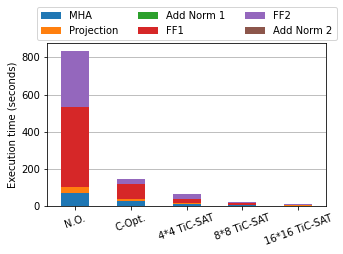

In [10]:
from matplotlib.patches import Rectangle
tisat_benefit_list = ["Med-power Conventional BERT large", "Conventional Tiled L1", "Conventional Tiled L1,L2 128_32_32",
                      "Med-power SMM BERT large K4", "Med-power SMM BERT large K8", "Med-power SMM BERT large v4"]
# tisat_benefit_list = ["Conventional Tiled L1,L2 128_32_32",
#                       "Med-power SMM BERT large K4", "Med-power SMM BERT large K8", "Med-power SMM BERT large v4"]
xticks = {"Med-power Conventional BERT large" : "N.O.",
          # "Conventional Tiled L1": "L1-Opt.",
          "Conventional Tiled L1,L2 128_32_32": "C-Opt.",
          "Med-power SMM BERT large K4": "4*4 TiC-SAT",
          "Med-power SMM BERT large K8": "8*8 TiC-SAT",
          "Med-power SMM BERT large v4": "16*16 TiC-SAT"}

benefit_df = df[df["model"].isin(tisat_benefit_list)]
benefit_df["model"].replace(xticks, inplace=True)
sim_seconds = benefit_df[['model', 'layer', 'sim_seconds']].pivot(index='model', columns='layer', values='sim_seconds')
sim_seconds = sim_seconds[categories]
# plt.figure(figsize=(12,8))
ax= sim_seconds.loc[xticks.values()].plot.bar(figsize=(5,3), stacked=True, zorder=4, legend=False)
plt.legend(bbox_to_anchor=(0.5, 1.25),  loc="upper center", ncol=3)
# plot.add_patch(Rectangle((0.5,0),8,1000,fill=True, color='g', alpha=0.15, zorder=1))
# plot.add_patch(Rectangle((2.5,0),8,450,fill=True, color='g', alpha=0.2, zorder=1))
# plt.text(0.7, 700, 'Software\nOptimized', fontsize = 14)
# plt.text(2.7, 200, 'Software\nOptimized +\nTiC-SAT', fontsize = 14)

plt.ylabel("Execution time (seconds)")
plt.grid(axis='y',zorder=2)
plt.xlabel("")
plt.xticks(rotation=20)

# speedup = benefit_df.groupby('model')['sim_seconds'].sum().reset_index(name = 'speed-up')
# speedup['speed-up'] = speedup['speed-up'].max() / speedup['speed-up']
# speedup = speedup.set_index('model')
# ax2 = ax.twinx()
# speedup.loc[xticks.values()].plot(zorder=4, ax=ax2, marker='x', color='k')
# for p in ax2.patches:
#     ax2.annotate(str(np.round(p.get_height(), 1)), (p.get_x() * 1.01, p.get_height() * 1.009))
# plt.ylabel("Execution speed-up")
# plt.legend(loc="upper center", ncol=3)

# plt.figure(figsize=(6,3))
# ax = speedup.loc[xticks.values()].plot.bar(zorder=4)
# for p in ax.patches:
#     print(p.get_x(), p.get_height())
#     ax.annotate(str(np.round(p.get_height(), 1)), (p.get_x() * 1.01, p.get_height() * 1.009))


plt.savefig("output/sim_time.png", bbox_inches='tight', dpi=300)



In [11]:
sim_seconds['total_seconds'] = sim_seconds.sum(axis=1)
sim_seconds['total_seconds']

model
16*16 TiC-SAT              9.343326
4*4 TiC-SAT               63.075236
8*8 TiC-SAT               22.636983
C-Opt.                   146.482826
Conventional Tiled L1    148.435940
N.O.                     836.371598
Name: total_seconds, dtype: float64

In [7]:
sim_seconds.to_csv('executionTime.csv')

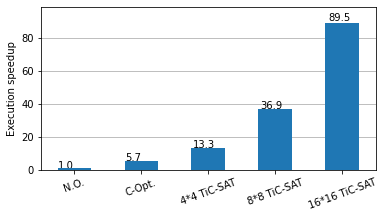

In [43]:
speedup = benefit_df.groupby('model')['sim_seconds'].sum()
speedup = speedup.max() / speedup
plt.figure(figsize=(6,3))
ax = speedup.loc[xticks.values()].plot.bar(zorder=4)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(), 1)), (p.get_x() * 1.01, p.get_height() * 1.009))
# plt.title("Simulation Speed up")
plt.ylabel("Execution speedup")
plt.xlabel("")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)
plt.ylim([0, 99])
# ax.add_patch(Rectangle((0.5,0),8,100,fill=True, color='g', alpha=0.15, zorder=1))
# ax.add_patch(Rectangle((2.5,0),8,100,fill=True, color='g', alpha=0.2, zorder=1))
# plt.text(0.7, 80, 'Software\nOptimized', fontsize = 14)
# plt.text(2.7, 72, 'Software\nOptimized +\nTiC-SAT', fontsize = 14)
plt.savefig("output/speedup.png", bbox_inches='tight', dpi=300)

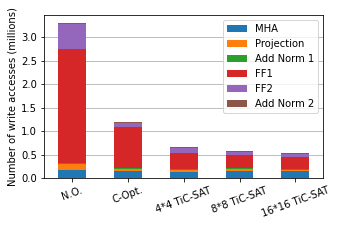

In [9]:

main_memory = benefit_df[['model', 'layer', 'system.mem_ctrls.num_writes::total']].pivot(index='model', columns='layer',
                                                                                         values='system.mem_ctrls.num_writes::total')
main_memory = main_memory[categories] / 1e6
main_memory.loc[xticks.values()].plot.bar(stacked=True, zorder = 4, figsize=(5,3), legend=False)
plt.legend()
plt.ylabel("Number of write accesses (millions)")
plt.xlabel("")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)
plt.savefig("output/write_off.png", bbox_inches='tight',dpi=300)


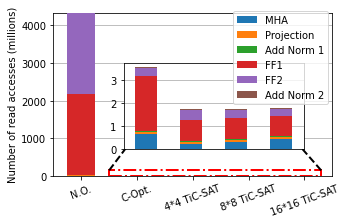

In [10]:
import matplotlib.lines as lines
main_memory = benefit_df[['model', 'layer', 'system.mem_ctrls.num_reads::total']].pivot(index='model', columns='layer',
                                                                                        values='system.mem_ctrls.num_reads::total')
main_memory = main_memory[categories] / 1e6
ax = main_memory.loc[xticks.values()].plot.bar(stacked=True, zorder = 4, figsize=(5,3), legend=False)
plt.ylabel("Number of read accesses (millions)")
plt.xlabel("")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)

ax.add_patch(Rectangle((0.5,0),3.8,150,fill=False, linestyle='dashdot', linewidth=2, color='r', zorder=1))
ax.add_artist(lines.Line2D([0.5,0.8], [150,740], color='k',linestyle='dashed', linewidth=2))
ax.add_artist(lines.Line2D([4.3,3.95], [150,740], color='k',linestyle='dashed', linewidth=2))
axes = plt.axes([.32, .25, .5, .4])
main_memory.loc[list(xticks.values())[1:]].plot.bar(ax=axes, stacked=True, zorder = 5, legend=False)
plt.legend(bbox_to_anchor=(0.58,1.65), loc="upper left")
plt.xticks([])
plt.xlabel(None)
plt.grid(axis='y', zorder=2)
plt.savefig("output/read_off.png", bbox_inches='tight', dpi=300)


Text(0.5, 1.0, 'Num of Writes Accesses to the Main Memory in Logarithmic Scale')

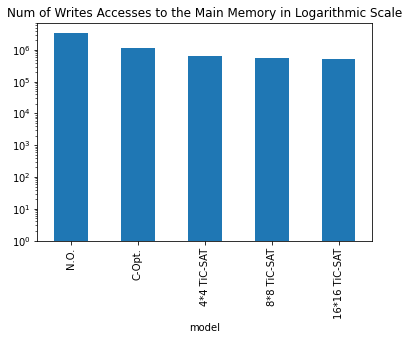

In [11]:
main_memory_total = benefit_df.groupby(['model'])['system.mem_ctrls.num_writes::total'].sum()
main_memory_total.loc[xticks.values()].plot.bar(log=True)
plt.title('Num of Writes Accesses to the Main Memory in Logarithmic Scale')

Text(0.5, 1.0, 'Num of Read Accesses to the Main Memory in Logarithmic Scale')

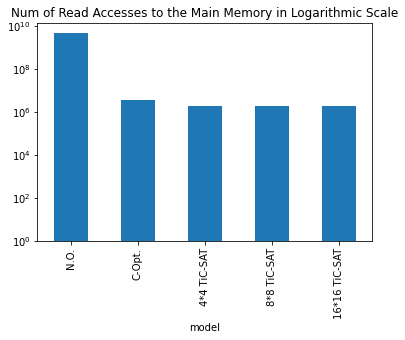

In [12]:
main_memory_total = benefit_df.groupby(['model'])['system.mem_ctrls.num_reads::total'].sum()
main_memory_total.loc[xticks.values()].plot.bar(log=True)
plt.title('Num of Read Accesses to the Main Memory in Logarithmic Scale')


/tmp/ipykernel_8660/734336734.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  L1_miss_total = benefit_df.groupby(['model'])['system.cpu.dcache.overall_misses::total',


Text(0.5, 1.0, 'Num of Overall Misses in L1 data and L1 inst.')

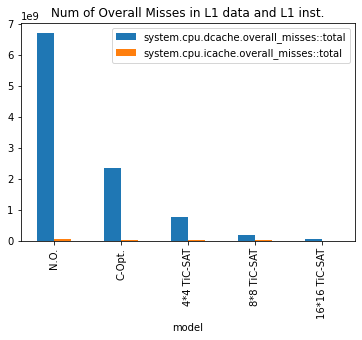

In [13]:
L1_miss_total = benefit_df.groupby(['model'])['system.cpu.dcache.overall_misses::total',
                                              'system.cpu.icache.overall_misses::total'].sum()
L1_miss_total.loc[xticks.values()].plot.bar()
plt.title('Num of Overall Misses in L1 data and L1 inst.')

/tmp/ipykernel_8660/2790063382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benefit_df['main_memory.overall_accesses::total'] = benefit_df[['system.mem_ctrls.num_reads::total',
/tmp/ipykernel_8660/2790063382.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  memory_hit_df = benefit_df.groupby(['model'])['main_memory.overall_accesses::total',


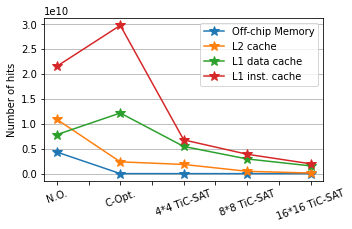

In [14]:
benefit_df['main_memory.overall_accesses::total'] = benefit_df[['system.mem_ctrls.num_reads::total',
                                                               'system.mem_ctrls.num_writes::total']].sum(axis=1)
memory_hit_df = benefit_df.groupby(['model'])['main_memory.overall_accesses::total',
                                                 'system.l2.overall_hits::total',
                                                'system.cpu.dcache.overall_hits::total',
                                                'system.cpu.icache.overall_hits::total'].sum()
memory_labels = {'main_memory.overall_accesses::total': 'Off-chip Memory',
                 'system.l2.overall_hits::total': 'L2 cache',
                'system.cpu.dcache.overall_hits::total': 'L1 data cache',
                'system.cpu.icache.overall_hits::total': 'L1 inst. cache'}
memory_hit_df.rename(columns=memory_labels, inplace=True)
memory_hit_df.loc[xticks.values()].plot(marker="*", markersize=10, figsize=(5,3))
plt.ylabel("Number of hits")
plt.xlabel("")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)
plt.savefig("output/mem_hits.png", bbox_inches='tight',dpi=300)

/tmp/ipykernel_8660/2511106135.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  memory_access_df = benefit_df.groupby(['model'])['main_memory.overall_accesses::total',


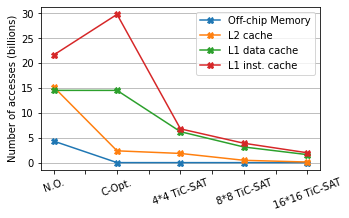

In [15]:
memory_access_df = benefit_df.groupby(['model'])['main_memory.overall_accesses::total',
                                                 'system.l2.overall_accesses::total',
                                                'system.cpu.dcache.overall_accesses::total',
                                                'system.cpu.icache.overall_accesses::total'].sum()
memory_labels = {'main_memory.overall_accesses::total': 'Off-chip Memory',
                 'system.l2.overall_accesses::total': 'L2 cache',
                'system.cpu.dcache.overall_accesses::total': 'L1 data cache',
                'system.cpu.icache.overall_accesses::total': 'L1 inst. cache'}
memory_access_df.rename(columns=memory_labels, inplace=True)
memory_access_df = memory_access_df/1e9
memory_access_df.loc[xticks.values()].plot(marker="X", figsize=(5,3))
plt.ylabel("Number of accesses (billions)")
plt.xlabel("")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)
plt.savefig("output/mem_access.png", bbox_inches='tight',dpi=300)

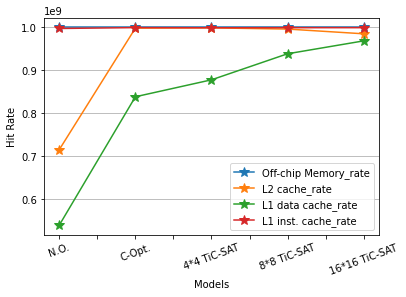

In [16]:
memory_rate_df = pd.merge(memory_hit_df, memory_access_df, on='model',suffixes=['_hit', '_access'])
for mem in memory_labels.values():
    memory_rate_df['{}_rate'.format(mem)] = memory_rate_df['{}_hit'.format(mem)] / memory_rate_df['{}_access'.format(mem)]

condition = ['{}_rate'.format(mem) for mem in memory_labels.values()]
memory_rate_df[condition].loc[xticks.values()].plot(marker="*", markersize=10, figsize=(6,4))
plt.ylabel("Hit Rate")
plt.xlabel("Models")
plt.xticks(rotation=20)
plt.grid(axis='y',zorder=2)
plt.savefig("output/mem_rate.png",dpi=300)

In [17]:

mem_cpu_access = benefit_df.groupby(['model'])['system.cpu.op_class_0::MemRead',
                                                'system.cpu.op_class_0::MemWrite',
                                               'system.switch_cpus.op_class_0::MemRead',
                                                'system.switch_cpus.op_class_0::MemWrite'].sum()
mem_cpu_access['total'] = mem_cpu_access.sum(axis=1)

pd.merge(memory_access_df, mem_cpu_access, on='model')

/tmp/ipykernel_8660/2501836453.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mem_cpu_access = benefit_df.groupby(['model'])['system.cpu.op_class_0::MemRead',


,Off-chip Memory,L2 cache,L1 data cache,L1 inst. cache,system.cpu.op_class_0::MemRead,system.cpu.op_class_0::MemWrite,system.switch_cpus.op_class_0::MemRead,system.switch_cpus.op_class_0::MemWrite,total
model,,,,,,,,,
16*16 TiC-SAT,0.002326,0.121828,1.609814,1.982264,1.021965e+09,5.883230e+08,0.000000e+00,0.0,1.610288e+09
4*4 TiC-SAT,0.002393,1.847984,6.218878,6.788236,3.985337e+09,2.232739e+09,0.000000e+00,0.0,6.218076e+09
8*8 TiC-SAT,0.002311,0.470072,3.144190,3.896475,2.008493e+09,1.135858e+09,0.000000e+00,0.0,3.144351e+09
C-Opt.,0.004777,2.371429,14.522321,29.803218,1.425130e+10,2.710120e+08,0.000000e+00,0.0,1.452231e+10
Conventional Tiled L1,0.006128,2.290027,14.523366,29.765205,1.425194e+10,2.714526e+08,0.000000e+00,0.0,1.452340e+10
N.O.,4.332660,15.222411,14.525718,21.627570,0.000000e+00,0.000000e+00,1.427732e+10,246365921.0,1.452369e+10


In [18]:
benefit_df.groupby(['model'])[ 'system.l2.overall_misses::total',
                                'system.mem_ctrls.num_reads::total',
    'system.mem_ctrls.num_writes::total'].sum()

/tmp/ipykernel_8660/1852069812.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  benefit_df.groupby(['model'])[ 'system.l2.overall_misses::total',


,system.l2.overall_misses::total,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total
model,,,
16*16 TiC-SAT,1.793747e+06,1.793724e+06,531881.0
4*4 TiC-SAT,1.730090e+06,1.730066e+06,663223.0
8*8 TiC-SAT,1.740068e+06,1.740043e+06,570901.0
C-Opt.,3.589707e+06,3.589679e+06,1186933.0
Conventional Tiled L1,4.613725e+06,4.613702e+06,1514758.0
N.O.,4.329355e+09,4.329355e+09,3305318.0


In [19]:
benefit_df.groupby(['model', 'layer'])[
                                'system.cpu.dcache.overall_misses::total',
    'system.cpu.icache.overall_misses::total',
'system.l2.overall_accesses::total'].sum()

/tmp/ipykernel_8660/157981623.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  benefit_df.groupby(['model', 'layer'])[


system.cpu.dcache.overall_misses::total  \
model                 layer                                                 
16*16 TiC-SAT         Add Norm 1                             6.229000e+04   
                      Add Norm 2                             6.391500e+04   
                      FF1                                    1.796683e+07   
                      FF2                                    1.771198e+07   
                      MHA                                    1.002366e+07   
                      Projection                             4.409913e+06   
4*4 TiC-SAT           Add Norm 1                             6.189300e+04   
                      Add Norm 2                             6.383500e+04   
                      FF1                                    2.730995e+08   
                      FF2                                    2.698022e+08   
                      MHA                                    1.474438e+08   
                      Projection                             6.745172e+07   
8*8 TiC-SAT           Add Norm 1                             6.281800e+04   
                      Add Norm 2                             6.440400e+04   
                      FF1                                    6.941863e+07   
                      FF2                                    6.816424e+07   
                      MHA                                    3.769446e+07   
                      Projection                             1.707199e+07   
C-Opt.                Add Norm 1                             6.219500e+04   
                      Add Norm 2                             6.387000e+04   
                      FF1                                    2.220230e+09   
                      FF2                                    2.079646e+07   
                      MHA                                    5.738854e+06   
                      Projection                             9.606021e+07   
Conventional Tiled L1 Add Norm 1                             6.206600e+04   
                      Add Norm 2                             6.396200e+04   
                      FF1                                    2.219686e+09   
                      FF2                                    1.956955e+07   
                      MHA                                    4.771419e+06   
                      Projection                             1.760826e+07   
N.O.                  Add Norm 1                             6.269000e+04   
                      Add Norm 2                             6.376600e+04   
                      FF1                                    2.153722e+09   
                      FF2                                    2.154296e+09   
                      MHA                                    1.840231e+09   
                      Projection                             5.379377e+08   

                                  system.cpu.icache.overall_misses::total  \
model                 layer                                                 
16*16 TiC-SAT         Add Norm 1                                  33830.0   
                      Add Norm 2                                  34173.0   
                      FF1                                        258840.0   
                      FF2                                        231126.0   
                      MHA                                        344359.0   
                      Projection                                  81467.0   
4*4 TiC-SAT           Add Norm 1                                  34013.0   
                      Add Norm 2                                  33946.0   
                      FF1                                       1679269.0   
                      FF2                                       1620710.0   
                      MHA                                        797265.0   
                      Projection                                 295154.0   
8*8 TiC-SAT           Add Nor

In [20]:
# benefit_df['idleCycles'] = benefit_df[['system.cpu.idleCycles', 'system.switch_cpus.idleCycles']].max(axis=1)
# idle_cycles = benefit_df[['model', 'layer', 'idleCycles']].pivot(index='model', columns='layer',
#                                                                                          values='idleCycles')
# # idle_cycles
# idle_cycles.loc[tisat_benefit_list].plot.bar(stacked=True)
# plt.title('Num of Idle Cycles')

## Applicability of different systems
| System   |      Low-power      |  Middle-power | High-power |
|----------|:-------------:|:------:|:------:|
| CPU Core Frequency | 0.8 GHz | 1 GHz | 2.3 GHz |
| L1 Data/Inst. Cache Size |    32 KB   |   32 KB |  64 KB |
| L2 Cache Size | 512 KB |   1 MB | 1 MB |

No handles with labels found to put in legend.
No handles with labels found to put in legend.


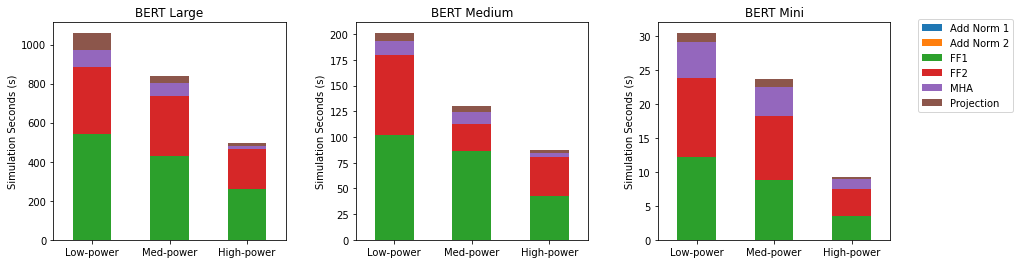

In [21]:
tisat_system_list = [["Low-power Conventional BERT large",
                     # "Low-power SMM BERT large",
                     "Med-power Conventional BERT large",
                     # "Med-power SMM BERT large v4",
                    "High-power Conventional BERT large",
                     # "High-power SMM BERT large"
                      ],
                  [ "Low-power Conventional BERT medium",
                     # "Low-power SMM BERT medium",
                     "Med-power Conventional BERT medium",
                     # "Med-power SMM BERT medium",
                   "High-power Conventional BERT medium",
                    # "High-power SMM BERT medium"
                    ],
                   ["Low-power Conventional BERT mini",
                      # "Low-power SMM BERT mini",
                    "Med-power Conventional BERT mini",
                     # "Med-power SMM BERT mini v2",
                   "High-power Conventional BERT mini",
                     # "High-power SMM BERT mini"
                    ]
                     ]

reference_SMM = {
    "Low-power SMM BERT large" : "Low-power Conventional BERT large",
    "Med-power SMM BERT large v4" : "Med-power Conventional BERT large",
    "High-power SMM BERT large" : "High-power Conventional BERT large",
    "Low-power SMM BERT medium" : "Low-power Conventional BERT medium",
    "Med-power SMM BERT medium" : "Med-power Conventional BERT medium",
    "High-power SMM BERT medium": "High-power Conventional BERT medium",
    "Low-power SMM BERT mini" : "Low-power Conventional BERT mini",
    "Med-power SMM BERT mini v2" : "Med-power Conventional BERT mini",
    "High-power SMM BERT mini" : "High-power Conventional BERT mini"
}

rename_list = {
    "Low-power Conventional BERT large": "Low-power",
    "Med-power Conventional BERT large": "Med-power",
    "High-power Conventional BERT large": "High-power",
}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)
tickers = ['BERT Large', 'BERT Medium', 'BERT Mini']
for idx, ax in enumerate(axs.ravel()):
    system_df = df[df["model"].isin(tisat_system_list[idx])]
    # system_df['model'].replace(rename_list, inplace=True)
    sim_seconds = system_df[['model', 'layer', 'sim_seconds']].pivot(index='model', columns='layer', values='sim_seconds')
    sim_seconds.loc[tisat_system_list[idx]].plot.bar(ax=ax, stacked=True, legend=False)
    ax.set_title("{}".format(tickers[idx]))
    ax.set_ylabel("Simulation Seconds (s)")
    ax.set_xticklabels(['Low-power', 'Med-power', 'High-power'], rotation=0)
    ax.set_xlabel("")
    plt.legend(bbox_to_anchor=(1.55, 0.8), loc="right")
    # ax2=ax.twinx()
    # speedup_df = system_df.groupby('model')[['sim_seconds']].sum()
    # speedup_df['speedup'] = np.NaN
    # for m in tisat_system_list[idx]:
    #     if m in reference_SMM.keys():
    #         ref_model = reference_SMM[m]
    #         speedup_df.loc[m, 'speedup'] = speedup_df.loc[ref_model]['sim_seconds'] / speedup_df.loc[m]['sim_seconds']
    # speedup_df.loc[tisat_system_list[idx]]['speedup'].plot(ax=ax2, marker='x',markersize =10)
    # ax2.set_ylim([30, 120])
    # ax2.set_ylabel("Speed up")
    # print(speedup_df)
plt.savefig("output/different_systems.png",  bbox_inches='tight')


In [22]:
tisat_system_list = ["Low-power Conventional BERT large",
                     "Low-power SMM BERT large",
                     "Med-power Conventional BERT large",
                     "Med-power SMM BERT large v4",
                    "High-power Conventional BERT large",
                     "High-power SMM BERT large",
                   "Low-power Conventional BERT medium",
                     "Low-power SMM BERT medium",
                     "Conventional BERT medium layer1",
                     "Med-power SMM BERT medium",
                   "High-power Conventional BERT medium",
                    "High-power SMM BERT medium",
                   "Low-power Conventional BERT mini",
                      "Low-power SMM BERT mini",
                    "Med-power Conventional BERT mini",
                     "Med-power SMM BERT mini v2",
                   "High-power Conventional BERT mini",
                     "High-power SMM BERT mini"
                     ]

tisat_system_list2 = ["Low-power  BERT large",
                     "Med-power  BERT large",
                    "High-power  BERT large",
                   "Low-power  BERT medium",
                     "Med-power  BERT medium",
                   "High-power  BERT medium",
                   "Low-power  BERT mini",
                    "Med-power  BERT mini",
                   "High-power  BERT mini",
                     ]

tisat_system_replace = {"Med-power SMM BERT mini v2" : "Med-power SMM BERT mini",
                        "Med-power SMM BERT large v4" : "Med-power SMM BERT large",
                        "Conventional BERT medium layer1" : "Med-power Conventional BERT medium"}
system_df = df[df["model"].isin(tisat_system_list)]
# system_df["model"].replace(tisat_system_replace, inplace=True)
system_df['optimization'] = system_df['model'].apply(lambda x: 'Non Optimized' if 'Conventional' in x else 'TiC-SAT')
# system_df["model"] = system_df['model'].apply(lambda x: x.replace('Conventional', '').replace('SMM', ''))
sim_seconds = system_df.groupby(["model", "optimization"])["sim_seconds"].sum().reset_index()
sim_seconds = sim_seconds.pivot(index='model', columns='optimization', values='sim_seconds')


/tmp/ipykernel_8660/493460387.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  system_df['optimization'] = system_df['model'].apply(lambda x: 'Non Optimized' if 'Conventional' in x else 'TiC-SAT')


/tmp/ipykernel_8660/4017952203.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,3500])


12.220016 1060.3716399999998 Low-power  BERT large
9.343326 836.3715980000002 Med-power  BERT large
4.328155000000001 493.90925 High-power  BERT large
2.8848279999999997 201.50211300000004 Low-power  BERT medium
2.229941 144.69042900000002 Med-power  BERT medium
0.9675849999999999 87.100429 High-power  BERT medium
0.782268 30.5497 Low-power  BERT mini
0.6212670000000001 23.755475000000004 Med-power  BERT mini
0.27542099999999997 9.246262999999999 High-power  BERT mini


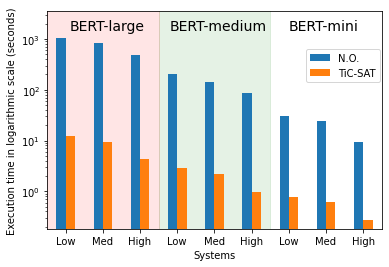

In [23]:
tisat_system_raw = ["Low-power {} BERT large",
                     "Med-power {} BERT large",
                    "High-power {} BERT large",
                   "Low-power {} BERT medium",
                     "Med-power {} BERT medium",
                   "High-power {} BERT medium",
                   "Low-power {} BERT mini",
                    "Med-power {} BERT mini",
                   "High-power {} BERT mini",
                     ]
sim_seconds = sim_seconds.reset_index()
sim_seconds['model'].replace(tisat_system_replace, inplace=True)
sim_seconds = sim_seconds.set_index('model')
sim_seconds_merged = pd.DataFrame(columns=['model', 'N.O.', 'TiC-SAT'])
for model in tisat_system_raw:
    ticsat = sim_seconds.loc[model.format('SMM'),'TiC-SAT']
    no = sim_seconds.loc[model.format('Conventional'),'Non Optimized']
    model_name= model.format('')
    print(ticsat, no, model_name)
    sim_seconds_merged = sim_seconds_merged.append({'model': model_name,
                               'N.O.': no,
                               'TiC-SAT':ticsat}, ignore_index=True)
plot = sim_seconds_merged.plot.bar(width=0.5, zorder=4, figsize=(6,4))
plt.yscale('log')
plot.add_patch(Rectangle((-0.5,0),3,5000,fill=True, color='r', alpha=0.1, zorder=1))
plot.add_patch(Rectangle((2.5,0),3,5000,fill=True, color='g', alpha=0.1, zorder=1))
plt.text(0.1, 1500, 'BERT-large', fontsize = 14)
plt.text(2.8, 1500, 'BERT-medium', fontsize = 14)
plt.text(6.0, 1500, 'BERT-mini', fontsize = 14)
plt.ylim([0,3500])
plt.xlim([-0.5,8.5])
plt.xticks(rotation=0)
plt.xlabel("Systems")
plt.ylabel("Execution time in logarithmic scale (seconds)")
plt.legend(bbox_to_anchor=(0.76,0.85), loc="upper left")

# ax2=plt.twinx()
# speedup_df = system_df.groupby('model')[['sim_seconds']].sum()
# speedup_df['speedup'] = np.NaN
# for m in tisat_system_list:
#     if m in reference_SMM.keys():
#         ref_model = reference_SMM[m]
#         speedup_df.loc[m, 'speedup'] = speedup_df.loc[ref_model]['sim_seconds'] / speedup_df.loc[m]['sim_seconds']
# speedup_df.loc[tisat_system_list]['speedup'].plot(ax=ax2, marker='X',markersize =10, color='r', zorder=4)


plt.xticks(np.arange(0, 9, 1), ['Low', 'Med', 'High'] * 3 )
# ax2.set_ylim([0, 130])
# ax2.set_ylabel("Speedup")

plt.savefig("output/low_high.png", bbox_inches='tight', dpi=300)


In [24]:
sim_seconds_merged['speedup'] = sim_seconds_merged['N.O.'] / sim_seconds_merged['TiC-SAT']
sim_seconds_merged

,model,N.O.,TiC-SAT,speedup
0,Low-power BERT large,1060.371640,12.220016,86.773343
1,Med-power BERT large,836.371598,9.343326,89.515404
2,High-power BERT large,493.909250,4.328155,114.115426
3,Low-power BERT medium,201.502113,2.884828,69.848918
4,Med-power BERT medium,144.690429,2.229941,64.885317
5,High-power BERT medium,87.100429,0.967585,90.018375
6,Low-power BERT mini,30.549700,0.782268,39.052729
7,Med-power BERT mini,23.755475,0.621267,38.237143
8,High-power BERT mini,9.246263,0.275421,33.571380


In [25]:
sim_access = system_df.groupby(["model", "optimization"])['system.mem_ctrls.num_reads::total'].sum().reset_index()
sim_access = sim_access.pivot(index='model', columns='optimization', values='system.mem_ctrls.num_reads::total')
sim_access


optimization,Non Optimized,TiC-SAT
model,,
Conventional BERT medium layer1,6.873848e+08,NaN
High-power Conventional BERT large,4.327146e+09,NaN
High-power Conventional BERT medium,7.688693e+08,NaN
High-power Conventional BERT mini,2.572804e+07,NaN
High-power SMM BERT large,NaN,5977896.0
High-power SMM BERT medium,NaN,329641.0
High-power SMM BERT mini,NaN,195899.0
Low-power Conventional BERT large,4.853275e+09,NaN
Low-power Conventional BERT medium,1.081717e+09,NaN


In [26]:
def get_optimization(x):
    pass
# sim_seconds = system_df.groupby("model")[["sim_seconds"]].sum().reset_index()
# sim_seconds['optimization'] = sim_seconds['model'].apply(lambda x: 'Non Optimized' if 'Conventional' in x else 'TiC-SAT')

## Benchmark

In [27]:
ViT_benchmark = ["ViT-B/32",
                 "ViT-B/16",
                 "ViT-L/32",
                 "ViT-L/16",
                 "ViT-H/14"]
Bert_benchmark = ["BERT tiny",
                  "BERT mini",
                  "BERT medium",
                  "BERT base",
                  "BERT large"]
tisat_benchmark_list = ["Conventional "+vit for vit in ViT_benchmark] + ["SMM "+vit for vit in ViT_benchmark]


benchmark_df = df[df["model"].isin(tisat_benchmark_list)]
benchmark_speedup = benchmark_df.groupby(["model"])['sim_seconds'].sum()
print(benchmark_speedup)
speedup_bench_df = pd.DataFrame(columns=['model', 'N.O.', 'TiC-SAT', 'speedup'])
for vit in ViT_benchmark:
    speedup = benchmark_speedup.loc["Conventional "+vit] / benchmark_speedup.loc["SMM "+vit]
    speedup_bench_df = speedup_bench_df.append({'model': vit,
                             'N.O.': benchmark_speedup.loc["Conventional "+vit],
                             'TiC-SAT': benchmark_speedup.loc["SMM "+vit],
                             'speedup': np.round(speedup, 1)
                             }, ignore_index=True)
print(speedup_bench_df)

benchmark_mem_acceess = benchmark_df.groupby("model")[['system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total']].sum()
speedup_bench_df['N.O. mem_read'] = speedup_bench_df['model'].apply(lambda x: benchmark_mem_acceess.loc["Conventional "+x]['system.mem_ctrls.num_reads::total'])
speedup_bench_df['N.O. mem_write'] = speedup_bench_df['model'].apply(lambda x: benchmark_mem_acceess.loc["Conventional "+x]['system.mem_ctrls.num_writes::total'])
speedup_bench_df['TiC-SAT mem_read'] = speedup_bench_df['model'].apply(lambda x: benchmark_mem_acceess.loc["SMM "+x]['system.mem_ctrls.num_reads::total'])
speedup_bench_df['TiC-SAT mem_write'] = speedup_bench_df['model'].apply(lambda x: benchmark_mem_acceess.loc["SMM "+x]['system.mem_ctrls.num_writes::total'])

speedup_bench_df['read_ratio'] = speedup_bench_df['N.O. mem_read']  / speedup_bench_df['TiC-SAT mem_read']
speedup_bench_df['write_ratio'] = speedup_bench_df['N.O. mem_write']  / speedup_bench_df['TiC-SAT mem_write']
speedup_bench_df['mem_ratio'] = (speedup_bench_df['N.O. mem_write'] + speedup_bench_df['N.O. mem_read'])  / \
                                (speedup_bench_df['TiC-SAT mem_write'] + speedup_bench_df['TiC-SAT mem_read'] )
speedup_bench_df


model
Conventional ViT-B/16    127.701944
Conventional ViT-B/32     22.259758
Conventional ViT-H/14    550.972258
Conventional ViT-L/16    318.319173
Conventional ViT-L/32     84.547086
SMM ViT-B/16               1.848392
SMM ViT-B/32               0.456109
SMM ViT-H/14               6.663632
SMM ViT-L/16               3.859161
SMM ViT-L/32               1.477432
Name: sim_seconds, dtype: float64
      model        N.O.   TiC-SAT  speedup
0  ViT-B/32   22.259758  0.456109     48.8
1  ViT-B/16  127.701944  1.848392     69.1
2  ViT-L/32   84.547086  1.477432     57.2
3  ViT-L/16  318.319173  3.859161     82.5
4  ViT-H/14  550.972258  6.663632     82.7


,model,N.O.,TiC-SAT,speedup,N.O. mem_read,N.O. mem_write,TiC-SAT mem_read,TiC-SAT mem_write,read_ratio,write_ratio,mem_ratio
0,ViT-B/32,22.259758,0.456109,48.8,7.686027e+06,150976.0,219024.0,54698.0,35.092168,2.760174,28.631250
1,ViT-B/16,127.701944,1.848392,69.1,5.121194e+08,713019.0,292959.0,108343.0,1748.092542,6.581127,1277.921520
2,ViT-L/32,84.547086,1.477432,57.2,4.760223e+08,374448.0,1661127.0,397826.0,286.565841,0.941236,231.378134
3,ViT-L/16,318.319173,3.859161,82.5,1.674443e+09,1279544.0,1659970.0,650784.0,1008.718841,1.966158,725.184316
4,ViT-H/14,550.972258,6.663632,82.7,2.340710e+09,2806114.0,913544.0,322484.0,2562.229901,8.701560,1896.005485


In [28]:
benchmark_custom_instr = benchmark_df.groupby(["model"])[['system.cpu.op_class_0::CusAluProcess',
                'system.cpu.op_class_0::CusAluParamWrite',
                'system.cpu.op_class_0::CusAluQueue']].sum()
benchmark_custom_instr

,system.cpu.op_class_0::CusAluProcess,system.cpu.op_class_0::CusAluParamWrite,system.cpu.op_class_0::CusAluQueue
model,,,
Conventional ViT-B/16,0.0,0.0,0.0
Conventional ViT-B/32,0.0,0.0,0.0
Conventional ViT-H/14,0.0,0.0,0.0
Conventional ViT-L/16,0.0,0.0,0.0
Conventional ViT-L/32,0.0,0.0,0.0
SMM ViT-B/16,7401600.0,3686400.0,22377600.0
SMM ViT-B/32,2227200.0,1781760.0,6765120.0
SMM ViT-H/14,25583616.0,14155776.0,77414400.0
SMM ViT-L/16,13026816.0,6488064.0,39384576.0


In [29]:
bert_benchmark = ["Conventional BERT tiny", "Med-power SMM BERT Tiny",
                  "Med-power Conventional BERT base", "Med-power SMM BERT base"]
df[df["model"].isin(bert_benchmark)].groupby(["model"])['sim_seconds'].sum()

model
Conventional BERT tiny                4.357817
Med-power Conventional BERT base    234.269966
Med-power SMM BERT Tiny               0.214890
Med-power SMM BERT base               4.936671
Name: sim_seconds, dtype: float64

## Gemm

In [30]:
benefit_df[benefit_df['model'] == '16*16 TiC-SAT'].head()

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,system.cpu.op_class_0::MemWrite,system.cpu.op_class_0::CusAluProcess,system.cpu.op_class_0::CusAluParamWrite,system.cpu.op_class_0::CusAluQueue,system.cpu.idleCycles,main_memory.overall_accesses::total
138,16*16 TiC-SAT,MHA,2.321872,2.321872e+12,457038.0,145172.0,498508150.0,10023662.0,3.268151e+11,508531812.0,...,1.491445e+09,33618773.0,4205220.0,322028693.0,186603341.0,10354688.0,4194304.0,31260672.0,1.651779e+08,602210.0
139,16*16 TiC-SAT,Projection,0.666359,6.663590e+11,81983.0,35356.0,117468077.0,4409913.0,1.241452e+11,121877990.0,...,3.625556e+08,8404355.0,3175.0,77407059.0,44542556.0,2588672.0,1048576.0,7815168.0,1.419867e+08,117339.0
140,16*16 TiC-SAT,Add Norm 1,0.020211,2.021076e+10,39226.0,20956.0,4457176.0,62290.0,4.911743e+09,4519466.0,...,8.355024e+06,5303.0,936.0,3189699.0,1401344.0,0.0,0.0,0.0,5.203575e+06,60182.0
141,16*16 TiC-SAT,FF1,3.236203,3.236203e+12,856445.0,248094.0,467484521.0,17966831.0,5.895210e+11,485451352.0,...,1.445055e+09,33615026.0,14089.0,308207674.0,177324823.0,10354688.0,4194304.0,31260672.0,1.132591e+09,1104539.0
142,16*16 TiC-SAT,FF2,3.078180,3.078180e+12,317881.0,59455.0,467164898.0,17711976.0,5.027998e+11,484876874.0,...,1.443885e+09,33610585.0,13429.0,307912603.0,177034497.0,10354688.0,4194304.0,31260672.0,9.540193e+08,377336.0


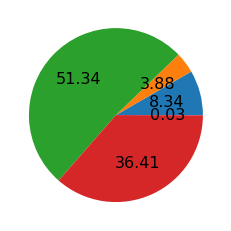

In [31]:

pie_df = benefit_df[benefit_df['model'] == 'N.O.']
pie_df = pie_df[['layer', 'sim_seconds']]
pie_df = pie_df.append({'layer': 'non-Gemm', 'sim_seconds': 0.24 + 0.0407}, ignore_index=True)
# pie_df.plot.pie(y='sim_seconds', legend=False, autopct='%.1f%%')
# plt.savefig('output/non_opt_pie.png')
pie_df = pie_df.replace({"MHA": "MHA-Gemm"})
pie_df = pie_df.drop(labels=[2,5]).set_index('layer')
pie_df.plot.pie(y='sim_seconds', legend=False, autopct='%.2f', figsize=(4,4), labels=None, textprops=dict(color="k", fontsize =16))
plt.ylabel('')
plt.savefig('output/NO_pie.png', bbox_inches='tight', dpi=300)


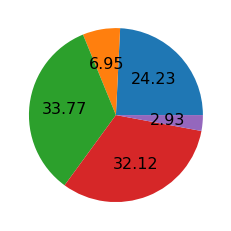

In [32]:
pie_df = benefit_df[benefit_df['model'] == '16*16 TiC-SAT']
pie_df = pie_df[['layer', 'sim_seconds']]
pie_df = pie_df.append({'layer': 'non-Gemm', 'sim_seconds': 0.24 + 0.0407}, ignore_index=True)
# pie_df.plot.pie(y='sim_seconds', legend=False, autopct='%.1f%%')
# plt.savefig('output/non_opt_pie.png')
pie_df = pie_df.replace({"MHA": "MHA-Gemm"})
pie_df = pie_df.drop(labels=[2,5]).set_index('layer')
# f, axes = plt.subplots(1,1, figsize=(4,4))
# ax.legend(patches, labels=df.index, loc='best')
pie_df.plot.pie(y='sim_seconds', legend=False, autopct='%.2f', figsize=(4,4), labels=None, textprops=dict(color="k", fontsize =16))
plt.ylabel('')
# plt.legend(['MHA', 'Projection', 'FF1', 'FF2', 'Non-GEMM'], bbox_to_anchor=(1.5,0.5), loc="center")
plt.savefig('output/SA_pie.png', bbox_inches='tight', dpi=300)


In [33]:
MHA_conventional = [1.15, 1.13, 1.07, 0.004, 0.39, 0.01, 0.43]
MHA_SMM = [0.039, 0.039, 0.039, 0.004, 0.021, 0.01, 0.021]
gem_list = ["Med-power Conventional BERT large", "Med-power SMM BERT large v4"]
print(np.sum(MHA_conventional), np.sum(MHA_conventional) * 16)
print(np.sum(MHA_SMM), np.sum(MHA_SMM) * 16)
df[df['model'].isin(gem_list)][['model', 'layer', 'sim_seconds']]

4.183999999999999 66.94399999999999
0.173 2.768


,model,layer,sim_seconds
36,Med-power Conventional BERT large,MHA,69.769738
37,Med-power Conventional BERT large,Projection,32.482152
38,Med-power Conventional BERT large,Add Norm 1,0.020244
39,Med-power Conventional BERT large,FF1,429.476127
40,Med-power Conventional BERT large,FF2,304.602903
41,Med-power Conventional BERT large,Add Norm 2,0.020434
138,Med-power SMM BERT large v4,MHA,2.321872
139,Med-power SMM BERT large v4,Projection,0.666359
140,Med-power SMM BERT large v4,Add Norm 1,0.020211
141,Med-power SMM BERT large v4,FF1,3.236203


In [34]:
pie_df = df[df['model'].isin(gem_list)][['model', 'layer', 'sim_seconds']].set_index('layer')
pie_df

,model,sim_seconds
layer,,
MHA,Med-power Conventional BERT large,69.769738
Projection,Med-power Conventional BERT large,32.482152
Add Norm 1,Med-power Conventional BERT large,0.020244
FF1,Med-power Conventional BERT large,429.476127
FF2,Med-power Conventional BERT large,304.602903
Add Norm 2,Med-power Conventional BERT large,0.020434
MHA,Med-power SMM BERT large v4,2.321872
Projection,Med-power SMM BERT large v4,0.666359
Add Norm 1,Med-power SMM BERT large v4,0.020211


In [35]:
latency_list = ["Med-power Conventional BERT large", "Low-power Conventional BERT large", "High-power Conventional BERT large",
                "Med-power SMM BERT large v4", "Low-power SMM BERT large", "High-power SMM BERT large",]
latency_df = df[df['model'].isin(latency_list)][['model','layer', 'system.l2.overall_miss_latency::total',
                'system.cpu.icache.overall_miss_latency::total',
                'system.cpu.dcache.overall_miss_latency::total',
                'system.l2.overall_misses::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.icache.overall_misses::total'
                ]]

latency_avg_df =latency_df.groupby(['model']).sum().reset_index()
latency_avg_df['l2 avg'] = latency_avg_df['system.l2.overall_miss_latency::total'] / latency_avg_df['system.l2.overall_misses::total']
latency_avg_df['l1 avg'] = latency_avg_df['system.cpu.dcache.overall_miss_latency::total'] / latency_avg_df['system.cpu.dcache.overall_misses::total']
latency_avg_df

,model,system.l2.overall_miss_latency::total,system.cpu.icache.overall_miss_latency::total,system.cpu.dcache.overall_miss_latency::total,system.l2.overall_misses::total,system.cpu.dcache.overall_misses::total,system.cpu.icache.overall_misses::total,l2 avg,l1 avg
0,High-power Conventional BERT large,3.583245e+14,2.354052e+11,3.725447e+14,4.327146e+09,4.933586e+09,15121037.0,82808.517930,75511.960137
1,High-power SMM BERT large,5.523844e+11,8.048681e+09,1.029563e+12,5.977917e+06,4.853840e+07,313184.0,92404.159494,21211.310907
2,Low-power Conventional BERT large,6.324291e+14,2.514230e+12,7.189408e+14,4.853275e+09,6.675938e+09,66461916.0,130309.762693,107691.347470
3,Low-power SMM BERT large,1.039070e+12,5.453928e+10,2.449213e+12,7.274890e+06,5.035341e+07,1177425.0,142829.642613,48640.452127
4,Med-power Conventional BERT large,4.827070e+14,1.531565e+12,5.630570e+14,4.329355e+09,6.686313e+09,50771123.0,111496.288353,84210.386455
5,Med-power SMM BERT large v4,2.919567e+11,3.434970e+10,1.553256e+12,1.793747e+06,5.023859e+07,983795.0,162763.591521,30917.583072


## Linearity

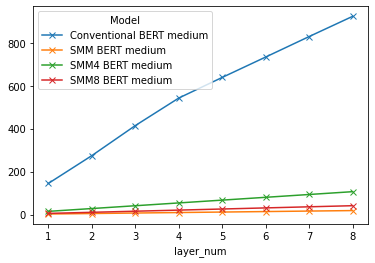

In [36]:
models_linearity = ["SMM", "SMM8", "SMM4", "Conventional"]
linear_timing_list = ["{} BERT medium layer{}".format(l, i) for i in range(1, 9) for l in models_linearity]
# ["Conventional BERT medium layer{}".format(i) for i in range(8)]
linear_df = df[df['model'].isin(linear_timing_list)]
model_linear_res = linear_df.groupby('model')['sim_seconds'].sum().reset_index()
model_linear_res['Model'] = model_linear_res['model'].apply(lambda x: ' '.join((x.split()[:3])))
model_linear_res['layer_num'] = model_linear_res['model'].apply(lambda x: int(x[-1]))
linear_pivot = model_linear_res.pivot(index='layer_num', columns='Model', values='sim_seconds').cumsum(axis=0)
linear_pivot.plot(marker = 'x')

TiC-SAT : SMM
TiC-SAT : SMM4
TiC-SAT : SMM8


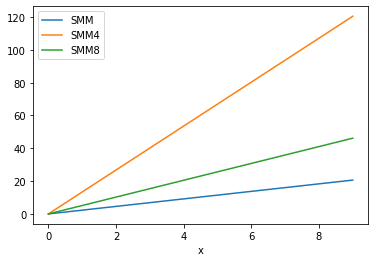

In [37]:
import statsmodels.formula.api as smf

ticsat_linearity = linear_pivot.reset_index()
slope = [[0, 0.0, 0.0 ,0.0], [9, 0.0 ,0.0, 0.0]]
slope_df = pd.DataFrame(data=slope, columns=["x"] + ["SMM", "SMM4", "SMM8"]).set_index("x")
for k in ["SMM", "SMM4", "SMM8"]:
    ticsat_linearity["{}".format(k)] = ticsat_linearity["{} BERT medium".format(k)]
    res = smf.ols('{} ~ layer_num -1'.format(k), data=ticsat_linearity).fit()
    print("TiC-SAT : {}".format(k))
    # print(res.summary())
    slope_df.loc[9]["{}".format(k)] = 9* res.params[0]

slope_df.plot()


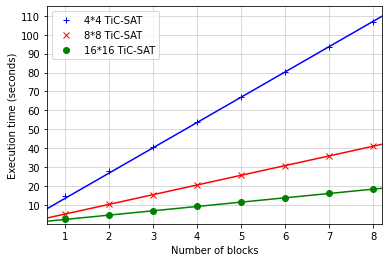

In [38]:
new_name_dict = {'SMM BERT medium': '16*16 TiC-SAT',
                         'SMM8 BERT medium': '8*8 TiC-SAT',
                         'SMM4 BERT medium': '4*4 TiC-SAT',}
ticsat_linearity = linear_pivot.drop(columns = ['Conventional BERT medium'])
ticsat_linearity.rename(columns=new_name_dict, inplace=True)
# ticsat_linearity.append({'layer_num': 0}, ignore_index=True, axis=0)
zero_dict = { 'layer_num': 0,
              '16*16 TiC-SAT': 0,
               '8*8 TiC-SAT': 0,
               '4*4 TiC-SAT': 0}
ticsat_linearity = ticsat_linearity[['4*4 TiC-SAT', '8*8 TiC-SAT', '16*16 TiC-SAT']]
# ticsat_linearity = ticsat_linearity.reset_index().append(zero_dict, ignore_index=True)
ticsat_linearity = ticsat_linearity.reset_index()
ticsat_linearity = ticsat_linearity.sort_values(by='layer_num')
ticsat_linearity = ticsat_linearity.set_index('layer_num')
fig, ax = plt.subplots(figsize=(6,4))
ticsat_linearity.plot(markersize=6, linestyle='none', ax = ax, color=['b', 'r', 'g'], legend=False)
plt.legend()
markers =  ['+', 'x', 'o']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

slope_df.plot(ax=ax, color=['g', 'b', 'r'],legend=False)
plt.yticks(np.arange(10,130, 10))
plt.grid(which='major', alpha=0.6)
plt.grid(which='minor', alpha=0.3)
plt.ylabel('Execution time (seconds)')
plt.xlabel('Number of blocks')
plt.ylim([0,115])
plt.xlim([0.6,8.2])
plt.savefig("output/linearity.png",  bbox_inches='tight', dpi=300)



In [39]:
test_df = pd.DataFrame({'x': range(0,10)}).assign(y=lambda x: np.sin(x))
res_test = smf.ols('y ~ x -1', data=test_df).fit()
print(res_test.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):             -0.031
Method:                 Least Squares   F-statistic:                             0.6955
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                       0.426
Time:                        13:57:41   Log-Likelihood:                         -10.048
No. Observations:                  10   AIC:                                      22.10
Df Residuals:                       9   BIC:                                      22.40
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:

slope_df/9

,SMM,SMM4,SMM8
x,,,
0,0.000000,0.000000,0.000000
9,2.290521,13.386937,5.129394


In [41]:
ticsat_mse = ticsat_linearity.reset_index()
ticsat_mse['predict 4'] = ticsat_mse['layer_num'] * 13.386937
ticsat_mse['predict 8'] = ticsat_mse['layer_num'] * 5.129394
ticsat_mse['predict 16'] = ticsat_mse['layer_num'] * 2.290521
ticsat_mse['se4'] = (ticsat_mse['predict 4'] - ticsat_mse['4*4 TiC-SAT']) **2
ticsat_mse['se8'] = (ticsat_mse['predict 8'] - ticsat_mse['8*8 TiC-SAT']) **2
ticsat_mse['se16'] = (ticsat_mse['predict 16'] - ticsat_mse['16*16 TiC-SAT']) **2
ticsat_mse.sum()/8

Model
layer_num         4.500000
4*4 TiC-SAT      60.555061
8*8 TiC-SAT      23.078706
16*16 TiC-SAT    10.308492
predict 4        60.241216
predict 8        23.082273
predict 16       10.307345
se4               0.478630
se8               0.000183
se16              0.000031
dtype: float64